# HR Separation Project
----
## Beginning some more rigorous approaches to analysis of an already processed file.


### load the prerequisite modules

In [1]:
import os, subprocess,random
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
stgdir1local = '/home/kesj/work/hrsepara/eda'
if os.path.exists(stgdir1local):
    os.chdir(stgdir1local)
    cwd = os.path.abspath(os.curdir)
print cwd

/home/kesj/work/hrsepara/eda


In [3]:
%ls

employee_dataframe3.ssv  employee_dataframe.tsv        histret_mod
employee_dataframe4.tsv  employee_table_summary_3.csv  SBR
employee_dataframe.ssv   employee_table_summary.csv    sbr_mod


###load the datafile

In [4]:
empl = pd.read_csv('employee_dataframe4.tsv',sep='\t',dtype={'EXT_FUNC_ID_SFI':np.str, 'FUNC_ID_SFI':np.str})
print empl.shape

(199419, 70)


In [5]:
empl.drop('Unnamed: 0',inplace=True,axis=1)

### specify the column information

In [6]:
def summarize_dataframe2(df,show_example=False):
    nrow = len(df)
    summary_df = pd.DataFrame(columns = ['Column','datatype','nmissing','arity','accepted values'])
    len_df = len(summary_df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        narity = len(df[col].unique())
        if show_example:
            r_index =random.randint(0,nrow)
            print col, df[col].dtype,nmiss, "\t", narity,":\t", df[col].ix[r_index]
        else:
            print col, df[col].dtype,nmiss, "\t", narity
        accept_val = None
        if narity < 20:
            accept_val = df[col].unique()
        summary_df.loc[len_df] = [col,df[col].dtype,nmiss,narity,accept_val]
        len_df+=1
    return summary_df

In [7]:
sdf = summarize_dataframe2(empl)

EXT_FUNC_ID_SFI object 0 	422
EMPL_CLASS object 0 	12
REH_CNT int64 0 	18
FLOR_SFI int64 0 	115
FULL_PART_TIME object 0 	4
ACTRES1 object 0 	25528
EEO1CODE object 0 	11
SHIFT object 0 	4
FUNCCNT1 int64 0 	4
LOC_STATE object 0 	52
INTERN object 0 	2
GRADE object 0 	164
TELE_MOS float64 0 	388
PERF1 float64 0 	78699
SUPVCNT1 int64 0 	12
ANNUAL_RT float64 0 	123705
LEGACY_DEPT_SFI object 0 	42660
CUR_LOC_MOS float64 0 	7883
Tenure_years float64 0 	15729
JOB_FAMILY object 0 	1456
ADDRCNT1 int64 0 	6
Age_years float64 0 	19297
COMPANY int64 0 	7
CUR_JOB_MOS float64 0 	6476
FUNC_CNT int64 0 	12070
SEX object 0 	2
FULLPART1 object 0 	2
ETHNIC_GROUP float64 0 	8
RELOCATE_ALL_SFI object 0 	2
LOCATION object 0 	13535
HUBIND object 0 	2
Tenure_months float64 0 	15729
STD_HOURS float64 0 	144
JOBCNT1 int64 0 	7
FLOORCNT1 int64 0 	6
MIN_RT_ANNUAL float64 0 	1441
PTFTCNT1 int64 0 	3
KEY int64 0 	199419
FLSA_STATUS object 0 	3
FTPTCNT1 int64 0 	3
CUR_GRADE_MOS float64 0 	4876
GRADECNT1 int64 0 	5
EFU

In [8]:
sdf.head()

,Column,datatype,nmissing,arity,accepted values
0,EXT_FUNC_ID_SFI,object,0,422,None
1,EMPL_CLASS,object,0,12,"[1, 3, D, T, O, 4, P, X, F, 5, 2, G]"
2,REH_CNT,int64,0,18,"[0, 2, 1, 5, 4, 3, 13, 10, 6, 7, 8, 11, 12, 15..."
3,FLOR_SFI,int64,0,115,None
4,FULL_PART_TIME,object,0,4,"[F, P, N, X]"


In [9]:
### confirm that no values are missing: 
if sdf.nmissing.sum()== 0:
    print "There are no missing values in the dataframe"

There are no missing values in the dataframe


# Survival analysis

In [10]:
import seaborn as sns
from lifelines import KaplanMeierFitter

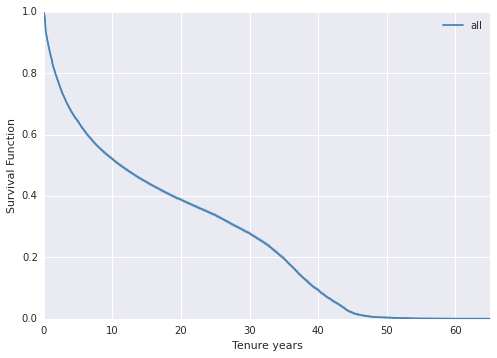

In [11]:
kmf0 = KaplanMeierFitter()
kmf0.fit(empl.Tenure_years,empl.status,label='all')
kmf0.plot(color='steelblue')
plt.ylabel('Survival Function')
plt.xlabel('Tenure years')

In [12]:
current = empl[empl.status==0].copy()
current.head()

,EXT_FUNC_ID_SFI,EMPL_CLASS,REH_CNT,FLOR_SFI,FULL_PART_TIME,ACTRES1,EEO1CODE,SHIFT,FUNCCNT1,LOC_STATE,...,MAX_RT_ANNUAL,LOCCNT1,PARTFULL1,MERIT1,DEPTCNT1,FUNC_ID_SFI,EMPL_TYPE,CUR_FUNC_MOS,CUR_DEPT_MOS,COMP_FREQUENCY
1,00071,1,0,999,P,MISCELLANEOUS DATA CHANGE;MISCELLANEOUS DATA C...,5,1,0,AZ,...,38026.9,0,N,856.215,0,00933,H,6.709677,6.709677,H
4,00944,1,0,999,F,MISCELLANEOUS DATA CHANGE;SALARY ADJUSTMENT;TR...,5,1,1,GA,...,51294.0,1,N,4208.720,1,00941,E,10.967742,10.967742,A
8,00125,1,1,999,F,INCENTIVE;MERIT;MISCELLANEOUS DATA CHANGE,2,1,0,MD,...,66110.0,0,N,1274.090,0,00014,E,18.225807,18.225807,A
11,00999,1,0,999,F,TRANSFER W/O JOB NUMBER CHANGE;MISCELLANEOUS D...,5,1,1,VA,...,51294.0,0,N,790.270,1,00039,E,3.709677,3.709677,A
12,00328,1,0,999,F,MISCELLANEOUS DATA CHANGE;TRANSFER W/ JOB NUMB...,2,1,0,OR,...,86674.5,0,N,1830.310,2,00014,E,173.290323,3.064516,A


In [13]:
sum(kmf0.predict(current.Tenure_years+1))/len(current)

0.48121524839345042

## the median employee tenure (in years) 

In [14]:
kmf0.median_

11.165184774499133

In [15]:
kmf0.confidence_interval_

,all_upper_0.95,all_lower_0.95
0.000000,0.999243,0.998982
0.002738,0.998671,0.998331
0.005476,0.998095,0.997693
0.008214,0.997602,0.997153
0.010952,0.996837,0.996324
0.013690,0.996784,0.996267
0.016427,0.996624,0.996096
0.019165,0.996092,0.995525
0.021903,0.995645,0.995048
0.024641,0.995194,0.994567


### differences betwen Male and Female

In [16]:
male = empl[empl['SEX'] =='M']
female = empl[empl['SEX'] =='F']
len(male),len(female)

(74659, 124760)

In [17]:
min_tenure_months= empl.Tenure_months.min()
max_tenure_months = empl.Tenure_months.max()
print min_tenure_months, max_tenure_months
tenure_month_range = np.linspace(min_tenure_months,max_tenure_months,65)
len(tenure_month_range)
min_tenure_years= empl.Tenure_years.min()
max_tenure_years = empl.Tenure_years.max()
print min_tenure_years, max_tenure_years
tenure_year_range = np.linspace(min_tenure_years,max_tenure_years,65)
len(tenure_year_range)

0.0 781.519127703
0.0 65.1265939752


65

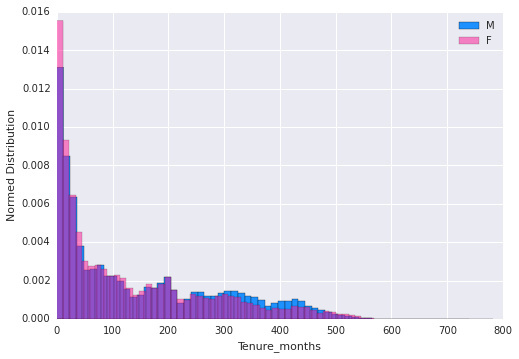

In [18]:
male.Tenure_months.hist(normed=True,color='dodgerblue',bins=65,label='M')
female.Tenure_months.hist(normed=True,color='deeppink',alpha=0.5,bins=65,label='F')
plt.xlabel('Tenure_months')
plt.ylabel('Normed Distribution')
plt.legend()

Median Male Tenure: 183.168545555
Median Female Tenure: 122.112363704


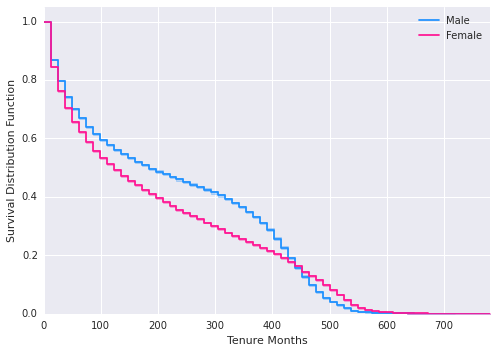

In [19]:
kmf_gender = KaplanMeierFitter()
#plt.figure(figsize=(20,10))
kmf_gender.fit(male.Tenure_months, timeline=tenure_month_range,event_observed=male.status,label='Male')
ax = kmf_gender.plot(c='dodgerblue')
print "Median Male Tenure:", kmf_gender.median_
kmf_gender.fit(female.Tenure_months,  timeline=tenure_month_range,event_observed=female.status,label='Female')
kmf_gender.plot(ax=ax, c='deeppink')
print "Median Female Tenure:", kmf_gender.median_
plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')

### Is this difference significant?
The logrank_test is used to compare the event series' generators. 

In [21]:
from lifelines.statistics import logrank_test

#summary, p_value, test_results = logrank_test(empl[empl.SEX==1].Tenure_months, empl[empl.SEX==0].Tenure_months, empl[empl.SEX==1].status, empl[empl.SEX==0].status, alpha=.99 )
#print summary

### Logic to transform binary categorical columns
* column = SEX; 1 = Male, 0 = female
* column = COMP_FREQUENCY --> new column: comp_frequency_annual (1 = A, 0 = H (hourly))
* other columns Y == 1, N == 0

In [22]:
empl['COMP_FREQ_ANNUAL'] = 1
empl.loc[empl['COMP_FREQUENCY']=='H','COMP_FREQ_ANNUAL'] = 0
empl.drop('COMP_FREQUENCY',axis=1,inplace=True)

# now deal with male,female
empl.replace({'SEX':{'M': 1,'F':0}},inplace=True)
#empl[['COMP_FREQ_ANNUAL','SEX','SHIFT']].head()

In [23]:
# assign 1 to Y, 0 to N for the following columns
columns_to_fix_NY = ['INTERN','FULLPART1','RELOCATE_ALL_SFI','HUBIND','REMOTE','REMOTE_SUPV','SUPV_DIFF_LOC','PARTFULL1']
#empltbl4['COMP_FREQ_ANNUAL'] = empltbl4[
for acol in columns_to_fix_NY:
    empl.replace({acol :{'Y':1,'N':0}},inplace=True) 

In [24]:
len(columns_to_fix_NY)

8

### encode the VOLINVOL column as  ['INVOLUNTARY':2,'VOLUNTARY':1,'NOT':0,'


In [25]:
empl['sep_status'] = empl['VOLINVOL'].replace({'NOT':0,'VOLUNTARY':1,'INVOLUNTARY':2,'OTHER':3,'UNKNOWN':3})
empl.sep_status.value_counts()

1    90055
0    69806
2    38738
3      820
dtype: int64

In [27]:
empl[empl.sep_status==3][['ANNUAL_RT','GRADE','SEX']]

,ANNUAL_RT,GRADE,SEX
212,0.00,XXX,1
511,0.00,XXX,1
642,0.00,XXX,1
695,0.00,XXX,1
944,0.00,XXX,1
2175,0.00,XXX,1
2224,0.00,XXX,1
2733,72800.00,NON,1
2919,0.00,XXX,1
4417,62000.00,NON,1


In [28]:
empl.columns

Index([u'EXT_FUNC_ID_SFI', u'EMPL_CLASS', u'REH_CNT', u'FLOR_SFI', u'FULL_PART_TIME', u'ACTRES1', u'EEO1CODE', u'SHIFT', u'FUNCCNT1', u'LOC_STATE', u'INTERN', u'GRADE', u'TELE_MOS', u'PERF1', u'SUPVCNT1', u'ANNUAL_RT', u'LEGACY_DEPT_SFI', u'CUR_LOC_MOS', u'Tenure_years', u'JOB_FAMILY', u'ADDRCNT1', u'Age_years', u'COMPANY', u'CUR_JOB_MOS', u'FUNC_CNT', u'SEX', u'FULLPART1', u'ETHNIC_GROUP', u'RELOCATE_ALL_SFI', u'LOCATION', u'HUBIND', u'Tenure_months', u'STD_HOURS', u'JOBCNT1', u'FLOORCNT1', u'MIN_RT_ANNUAL', u'PTFTCNT1', u'KEY', u'FLSA_STATUS', u'FTPTCNT1', u'CUR_GRADE_MOS', u'GRADECNT1', u'EFUNCCNT1', u'STATE', u'CUR_EFUNC_MOS', u'FTE', u'JOB_FUNCTION', u'SAL1', u'HIRE_DT', u'LOCSTCNT1', u'VOLINVOL', u'status', u'REMOTE', u'REMOTE_SUPV', u'JOBCODE', u'SUPV_DIFF_LOC', u'DIVISION_CODE_SFI', u'RELO_STATE_CNT_SFI', u'EXTFUNC_CNT', u'MAX_RT_ANNUAL', u'LOCCNT1', u'PARTFULL1', u'MERIT1', u'DEPTCNT1', u'FUNC_ID_SFI', u'EMPL_TYPE', u'CUR_FUNC_MOS', u'CUR_DEPT_MOS', u'COMP_FREQ_ANNUAL', u'sep_

In [29]:
sdf[sdf.Column=='CUR_GRADE_MOS']

,Column,datatype,nmissing,arity,accepted values
40,CUR_GRADE_MOS,float64,0,4876,None


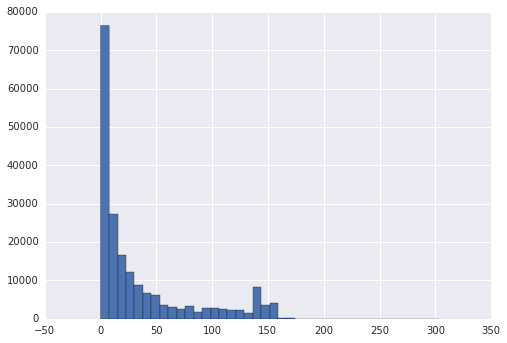

In [30]:
empl['CUR_GRADE_MOS'].hist(bins=40)

In [31]:
empl.CUR_GRADE_MOS.describe()

count    199419.000000
mean         34.716316
std          46.112510
min          -0.032258
25%           0.000000
50%          13.709677
75%          46.838710
max         303.000000
dtype: float64

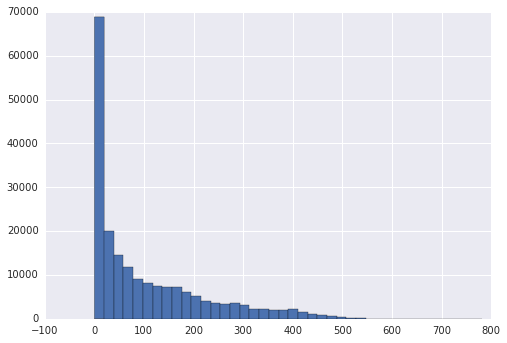

In [32]:
(empl.Tenure_months-empl.CUR_GRADE_MOS).hist(bins=40)

In [33]:
empl.GRADECNT1.value_counts()

0    175789
1     22466
2      1112
3        49
4         3
dtype: int64

In [34]:
sum(empl['ANNUAL_RT']-empl['SAL1'] !=0)

196

In [ ]:
empl[empl.GRADECNT1>2][['GRADE','Tenure_months','ANNUAL_RT','SAL1','status','sep_status','CUR_GRADE_MOS']]

### FOCUS only on VOLUNTARY Separations

In [ ]:
empl2 = empl[empl.sep_status <=1].copy()
empl2.index = np.arange(0,len(empl2)) # reassign indices
print len(empl2)
print "VALUE COUNTS 1: voluntary separation, 0: current employee"
print empl2.sep_status.value_counts()
print "_________________________________"
curr = empl2.sep_status == 0
volu = empl2.sep_status == 1


In [ ]:
pd.crosstab(empl2.sep_status,empl2.status) # just confirming that everything is in order

## Revisit some survival analysis

In [ ]:
sdf2 = summarize_dataframe2(empl2)

In [ ]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))

In [ ]:
printall(sdf2.sort(['datatype','arity'],ascending=True),len(sdf2))

In [ ]:
### apply survival analysis to EEO1CODE (arity = 11)
print empl2.EEO1CODE.unique()
empl2.EEO1CODE.value_counts()

In [ ]:
empl2.EEO1CODE.value_counts()/float(len(empl2))

In [ ]:
# create a Panel for the survival functions and confidence levels
e2_eeo_Panel = pd.Panel()

In [ ]:
fig=plt.figure(figsize=(12.5,5))
kmf_eeo=KaplanMeierFitter()

# threshold to plot output
my_col = 'EEO1CODE'

kmf_eeo.fit(empl2.Tenure_months, timeline=tenure_month_range, event_observed=empl2.status,label='ALL')
survf_eeo_df = pd.DataFrame(kmf_eeo.survival_function_)
ax=fig.add_subplot(111)
kmf_eeo.plot(ax=ax,c='darkslategray')
for g in list(empl2[my_col].unique()):
    
    #plt.figure(figsize=(20,10))
    gp_empl = empl2[my_col]==g#.isin(g)
    print g, sum(gp_empl)
    kmf_eeo.fit(empl2[gp_empl].Tenure_months, timeline=tenure_month_range,event_observed=empl2[gp_empl].status,label=g)
    if sum(gp_empl) > 200:
        kmf_eeo.plot(ax=ax)
    survf_eeo_df = pd.concat([survf_eeo_df,kmf_eeo.survival_function_],axis=1)

plt.ylim(0,1.05)
plt.ylabel('Survival Distribution Function')
plt.xlabel('Tenure Months')
plt.title(my_col)


In [ ]:
survf_eeo_df.head()

In [35]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation

In [ ]:
len(empl2),len(empl)

## Per discussion with HR team (Jeff Briks, Ron Davis, Sandeepa Sangras) on April 22, 2015
* need to look for retirement code in ACTRES
* need to use both voluntary and involuntary separation
* need to predict at individual level

In [36]:
# remove 'other' separation
empl3 = empl[empl.sep_status <=2 ].copy()
len(empl3) 

198599

In [37]:
# look at the list of ACTRES1 for  ReTIREMENT
uniq_action_reasons_1 = empl.ACTRES1.unique()
print len(uniq_action_reasons_1)
ret_action_reasons_1 = [x for x in uniq_action_reasons_1 if 'RETIREMENT' in x]
print len(ret_action_reasons_1)

25528
1260


In [38]:
retired = empl.ACTRES1.isin(ret_action_reasons_1)
sum(retired)

18115

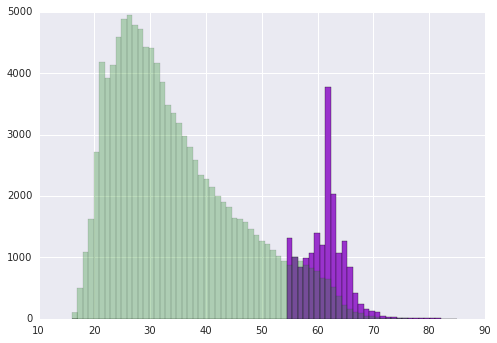

In [39]:
empl[retired].Age_years.hist(bins=70,range=[16,85],color='darkorchid')
empl[~retired][empl[~retired].status==1].Age_years.hist(bins=70,range=[16,85],color='forestgreen',alpha=0.3)

In [40]:
reduced_columns = list(empl3.columns)
[reduced_columns.remove(x) for x in ['KEY','ACTRES1','VOLINVOL','Tenure_months','SAL1','sep_status']]
print len(reduced_columns)

64


In [41]:
empl3.sep_status

0     2
1     0
2     1
3     2
4     0
5     2
6     2
7     1
8     0
9     1
10    1
11    0
12    0
13    0
14    1
...
199404    1
199405    1
199406    1
199407    0
199408    1
199409    0
199410    0
199411    1
199412    2
199413    1
199414    1
199415    0
199416    1
199417    1
199418    1
Name: sep_status, Length: 198599, dtype: int64

In [ ]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
cf = CoxPHFitter()

In [ ]:
%time
cf = CoxPHFitter()
scores = k_fold_cross_validation(cf, empl3[reduced_columns],empl3['Tenure_years'],event_col=empl3['status'],k=10)

In [ ]:
%%time
cf.fit(empl3[reduced_columns],'Tenure_years',event_col='status')

In [ ]:
empl3[reduced_columns].columns

In [ ]:
%time
model_columns=  ['Tenure_years','status','ANNUAL_RT','MERIT1','JOB_FUNCTION','Age_years','INTERN','SEX','COMP_FREQ_ANNUAL','CUR_DEPT_MOS','CUR_FUNC_MOS']
cf.fit(empl3[model_columns],'Tenure_years','status')

In [ ]:
len(empl3)

In [ ]:
printall(sdf2.sort(['datatype','arity'],ascending=False),len(sdf2))

In [ ]:
[reduced_columns.remove(x) for x in ['

In [46]:
from lifelines import AalenAdditiveFitter


In [48]:
aaf_1 = AalenAdditiveFitter(penalizer=1.0,fit_intercept=True)

In [ ]:
#np.corrcoef(empl3[['CUR_GRADE_MOS','CUR_FUNC_MOS']])

In [42]:
model_columns=  ['Tenure_years','status','ANNUAL_RT','MERIT1',
                 'Age_years','INTERN','SEX',
                 'COMP_FREQ_ANNUAL','CUR_DEPT_MOS','CUR_FUNC_MOS',
                 'MIN_RT_ANNUAL','PERF1','CUR_GRADE_MOS','CUR_LOC_MOS','MAX_RT_ANNUAL','CUR_JOB_MOS','CUR_EFUNC_MOS']
#,                 'JOB_FUNCTION','EMPL_TYPE']

In [43]:
X = empl3[model_columns]

In [44]:
X.head()

,Tenure_years,status,ANNUAL_RT,MERIT1,Age_years,INTERN,SEX,COMP_FREQ_ANNUAL,CUR_DEPT_MOS,CUR_FUNC_MOS,MIN_RT_ANNUAL,PERF1,CUR_GRADE_MOS,CUR_LOC_MOS,MAX_RT_ANNUAL,CUR_JOB_MOS,CUR_EFUNC_MOS
0,36.934366,1,75070.07,1036.470,56.729433,0,1,1,27.677419,192.838710,39500.00,5196.86,15.709677,27.677419,76500.0,25.387097,192.838710
1,0.564009,0,16099.20,856.215,21.322820,0,0,0,6.709677,6.709677,22400.90,648.12,6.709677,6.709677,38026.9,6.709677,6.709677
2,19.625317,1,34819.20,0.000,38.566158,0,0,1,0.000000,0.000000,0.00,0.00,0.000000,0.000000,999999.0,0.000000,0.000000
3,29.468093,1,39909.02,1619.640,62.963647,0,0,1,28.193548,28.193548,24882.50,1826.40,35.225806,103.612903,46065.0,48.935484,28.193548
4,2.058906,0,31045.35,4208.720,26.853392,0,1,1,10.967742,10.967742,31045.35,1012.50,10.967742,10.967742,51294.0,10.967742,10.967742


In [ ]:
%%time
scores_aaf_1 = k_fold_cross_validation(aaf_1, X[2:],X['Tenure_years'],X['status'],k=5)

In [49]:
%%time
aaf_1.fit(X,'Tenure_years','status')

 [-----------------100%-----------------] 128794 of 128793 complete in 14920.2 sec
CPU times: user 4h 8min 45s, sys: 10.9 s, total: 4h 8min 55s
Wall time: 4h 8min 41s


<lifelines.AalenAdditiveFitter: fitted with 198599 observations, 69806 censored>

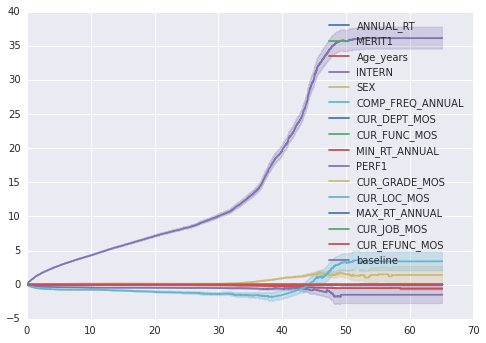

In [53]:
aaf_1.plot()

In [56]:
aaf_1.cumulative_hazards_.loc[:10]

,ANNUAL_RT,MERIT1,Age_years,INTERN,SEX,COMP_FREQ_ANNUAL,CUR_DEPT_MOS,CUR_FUNC_MOS,MIN_RT_ANNUAL,PERF1,CUR_GRADE_MOS,CUR_LOC_MOS,MAX_RT_ANNUAL,CUR_JOB_MOS,CUR_EFUNC_MOS,baseline
0.000000,-7.494941e-09,5.208108e-08,0.000000,-0.000561,0.000006,-0.000484,-0.000004,-0.000001,-9.685673e-09,0.000000,-0.000003,-0.000002,2.909774e-11,-0.000001,-9.007198e-08,0.001865
0.002738,-1.478374e-08,1.128949e-07,0.000000,-0.001089,0.000029,-0.001675,-0.000008,-0.000002,-2.021223e-08,0.000000,-0.000006,-0.000003,6.487583e-11,-0.000001,-1.192931e-07,0.004323
0.005476,-2.121660e-08,1.753197e-07,0.000006,-0.001636,0.000093,-0.002805,-0.000012,-0.000003,-3.044779e-08,0.000000,-0.000009,-0.000005,9.277869e-12,-0.000002,-2.203472e-07,0.006511
0.008214,-2.466352e-08,2.408840e-07,0.000013,-0.002115,-0.000040,-0.003913,-0.000016,-0.000004,-4.209690e-08,0.000001,-0.000012,-0.000007,-1.654417e-10,-0.000003,-2.871028e-07,0.008544
0.010952,-3.126639e-08,3.087264e-07,0.000005,-0.002854,-0.000142,-0.003772,-0.000021,-0.000005,-5.955004e-08,0.000001,-0.000015,-0.000009,-2.442147e-10,-0.000004,-3.329088e-07,0.010542
0.013690,-3.178725e-08,3.177025e-07,0.000007,-0.002906,-0.000164,-0.003951,-0.000021,-0.000005,-6.068215e-08,0.000001,-0.000016,-0.000009,-2.951830e-10,-0.000004,-3.379932e-07,0.010804
0.016427,-3.338282e-08,3.317089e-07,0.000010,-0.003075,-0.000093,-0.004511,-0.000022,-0.000005,-6.201964e-08,0.000001,-0.000017,-0.000010,-3.369126e-10,-0.000004,-4.021304e-07,0.011549
0.019165,-3.928974e-08,3.850741e-07,0.000015,-0.003563,-0.000059,-0.005945,-0.000026,-0.000006,-6.975752e-08,0.000001,-0.000019,-0.000011,-2.905447e-10,-0.000005,-5.110385e-07,0.013873
0.021903,-4.397594e-08,4.360365e-07,0.000017,-0.003983,-0.000025,-0.006861,-0.000029,-0.000007,-7.899458e-08,0.000001,-0.000022,-0.000013,-3.253740e-10,-0.000005,-5.545953e-07,0.015693
0.024641,-5.037210e-08,4.908110e-07,0.000032,-0.004348,-0.000049,-0.007994,-0.000032,-0.000008,-8.475990e-08,0.000001,-0.000024,-0.000014,-3.228261e-10,-0.000006,-6.947994e-07,0.017289


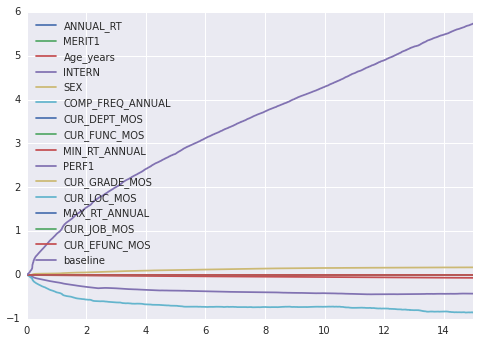

In [59]:
aaf_1.cumulative_hazards_.loc[:15,].plot()

In [77]:
outfile = open('empl_aaf_1_hazards.pkl','wb')

In [61]:
import pickle

In [76]:
aaf_1.hazards_

,ANNUAL_RT,MERIT1,Age_years,INTERN,SEX,COMP_FREQ_ANNUAL,CUR_DEPT_MOS,CUR_FUNC_MOS,MIN_RT_ANNUAL,PERF1,CUR_GRADE_MOS,CUR_LOC_MOS,MAX_RT_ANNUAL,CUR_JOB_MOS,CUR_EFUNC_MOS,baseline
0.000000,-7.494941e-09,5.208108e-08,0.000000,-0.000561,0.000006,-0.000484,-0.000004,-0.000001,-9.685673e-09,0.000000,-0.000003,-0.000002,2.909774e-11,-0.000001,-9.007198e-08,0.001865
0.002738,-1.478374e-08,1.128949e-07,0.000000,-0.001089,0.000029,-0.001675,-0.000008,-0.000002,-2.021223e-08,0.000000,-0.000006,-0.000003,6.487583e-11,-0.000001,-1.192931e-07,0.004323
0.005476,-2.121660e-08,1.753197e-07,0.000006,-0.001636,0.000093,-0.002805,-0.000012,-0.000003,-3.044779e-08,0.000000,-0.000009,-0.000005,9.277869e-12,-0.000002,-2.203472e-07,0.006511
0.008214,-2.466352e-08,2.408840e-07,0.000013,-0.002115,-0.000040,-0.003913,-0.000016,-0.000004,-4.209690e-08,0.000001,-0.000012,-0.000007,-1.654417e-10,-0.000003,-2.871028e-07,0.008544
0.010952,-3.126639e-08,3.087264e-07,0.000005,-0.002854,-0.000142,-0.003772,-0.000021,-0.000005,-5.955004e-08,0.000001,-0.000015,-0.000009,-2.442147e-10,-0.000004,-3.329088e-07,0.010542


In [78]:
pickle.dump(aaf_1.hazards_,outfile)

In [81]:
pickle.dump(aaf_1.confidence_intervals_,open('empl1_aaf_1_ci.pkl','wb'))